## Importing The Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3 as sql
# # You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
# %config InlineBackend.figure_format = 'svg'
# # this statement allows the visuals to render within your Jupyter Notebook
# %matplotlib inline 

### Reading the data to start the analysis process 

In [2]:
conection = sql.connect('All_df.db')

In [3]:
Basic_df = pd.read_sql('SELECT * FROM All_df', conection)

In [4]:
Basic_df.head()

,index,PERIOD,DATE,STATION,C/A,UNIT,SCP,ENTRIES_PER_DAY,EXITS_PER_DAY,WEEKDAY,WEEKDAY_INDEX,TRAFFIC
0,0,2018-2019,2018-12-22 00:00:00,1 AV,H007,R248,00-00-00,2059,2559,Saturday,5,4618
1,1,2018-2019,2018-12-22 00:00:00,1 AV,H007,R248,00-00-01,2680,1180,Saturday,5,3860
2,2,2018-2019,2018-12-22 00:00:00,1 AV,H007,R248,00-03-00,522,722,Saturday,5,1244
3,3,2018-2019,2018-12-22 00:00:00,1 AV,H007,R248,00-03-01,451,159,Saturday,5,610
4,4,2018-2019,2018-12-22 00:00:00,1 AV,H007,R248,00-03-02,758,55,Saturday,5,813


##### first we need to reformat the _DATE_ to remove unmeaningful time
when storing the date object into database this issue occour

In [5]:
Basic_df['DATE'] = pd.to_datetime(Basic_df.DATE.apply(lambda x: x[:10]))

In [6]:
Basic_df.head()

,index,PERIOD,DATE,STATION,C/A,UNIT,SCP,ENTRIES_PER_DAY,EXITS_PER_DAY,WEEKDAY,WEEKDAY_INDEX,TRAFFIC
0,0,2018-2019,2018-12-22,1 AV,H007,R248,00-00-00,2059,2559,Saturday,5,4618
1,1,2018-2019,2018-12-22,1 AV,H007,R248,00-00-01,2680,1180,Saturday,5,3860
2,2,2018-2019,2018-12-22,1 AV,H007,R248,00-03-00,522,722,Saturday,5,1244
3,3,2018-2019,2018-12-22,1 AV,H007,R248,00-03-01,451,159,Saturday,5,610
4,4,2018-2019,2018-12-22,1 AV,H007,R248,00-03-02,758,55,Saturday,5,813


## Start analysis process

First we want to display the top 10 crowded station in each year

In [7]:
stations_per_period_df = pd.DataFrame(Basic_df.groupby(['PERIOD', 'STATION'], as_index = False).TRAFFIC.sum())
stations_per_period_df.head()

,PERIOD,STATION,TRAFFIC
0,2018-2019,1 AV,918275
1,2018-2019,103 ST,998354
2,2018-2019,103 ST-CORONA,752429
3,2018-2019,104 ST,123228
4,2018-2019,110 ST,416723


In [8]:
stations_per_period_df_10A = stations_per_period_df.loc[stations_per_period_df['PERIOD'] == '2020-2021',:].sort_values('TRAFFIC', ascending = False).head(10)
stations_per_period_df_10B = stations_per_period_df.loc[stations_per_period_df['PERIOD'] == '2019-2020',:].sort_values('TRAFFIC', ascending = False).head(10)
stations_per_period_df_10C = stations_per_period_df.loc[stations_per_period_df['PERIOD'] == '2018-2019',:].sort_values('TRAFFIC', ascending = False).head(10)

In [9]:
stations_per_period_df_10A.head()

,PERIOD,STATION,TRAFFIC
816,2020-2021,34 ST-PENN STA,1596380
814,2020-2021,34 ST-HERALD SQ,1437515
865,2020-2021,86 ST,1202076
764,2020-2021,125 ST,1165706
988,2020-2021,GRD CNTRL-42 ST,1069625


In [10]:
stations_per_period_df_10B.head()

,PERIOD,STATION,TRAFFIC
438,2019-2020,34 ST-PENN STA,6472614
436,2019-2020,34 ST-HERALD SQ,5114777
610,2019-2020,GRD CNTRL-42 ST,4998975
729,2019-2020,TIMES SQ-42 ST,3987242
423,2019-2020,23 ST,3750641


In [11]:
stations_per_period_df_10C.head()

,PERIOD,STATION,TRAFFIC
61,2018-2019,34 ST-PENN STA,6382231
232,2018-2019,GRD CNTRL-42 ST,5169156
59,2018-2019,34 ST-HERALD SQ,5046156
351,2018-2019,TIMES SQ-42 ST,4059869
46,2018-2019,23 ST,3690315


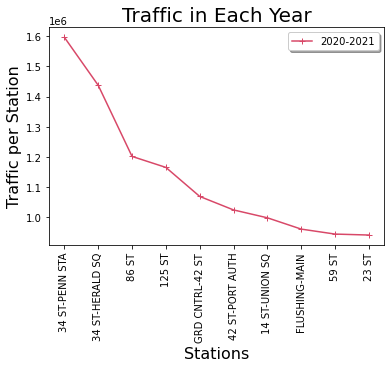

In [12]:
plt.plot(stations_per_period_df_10A.STATION, stations_per_period_df_10A.TRAFFIC, color='#D84868', marker='+')

plt.title('Traffic in Each Year', fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel('Stations', fontsize=16, )
plt.ylabel('Traffic per Station', fontsize=16)
plt.legend(['2020-2021'],shadow = True, loc = 0);
plt.show()


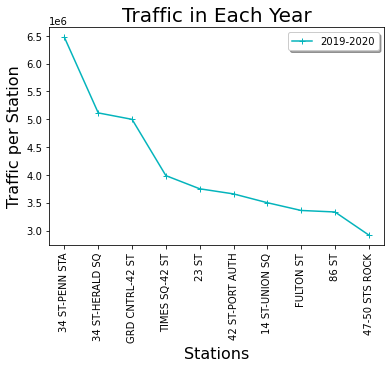

In [13]:
plt.plot(stations_per_period_df_10B.STATION, stations_per_period_df_10B.TRAFFIC, color='#04B4BC', marker='+')

plt.title('Traffic in Each Year', fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel('Stations', fontsize=16, )
plt.ylabel('Traffic per Station', fontsize=16)
plt.legend(['2019-2020'],shadow = True, loc = 0);
plt.show()


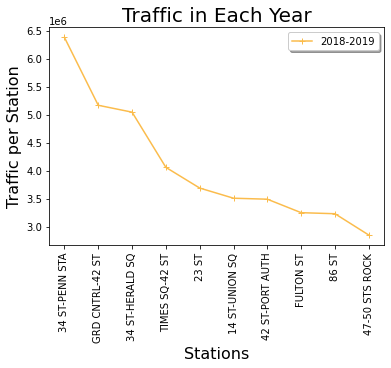

In [14]:
plt.plot(stations_per_period_df_10C.STATION, stations_per_period_df_10C.TRAFFIC, color='#FBBC4C', marker='+')

plt.title('Traffic in Each Year', fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel('Stations', fontsize=16, )
plt.ylabel('Traffic per Station', fontsize=16)
plt.legend(['2018-2019'],shadow = True, loc = 0);
plt.show()


In [15]:
inter1 = pd.Series(np.intersect1d(stations_per_period_df_10A['STATION'],stations_per_period_df_10B['STATION']))
inter1

0     14 ST-UNION SQ
1              23 ST
2    34 ST-HERALD SQ
3     34 ST-PENN STA
4    42 ST-PORT AUTH
5              86 ST
6    GRD CNTRL-42 ST
dtype: object

In [16]:
intersection_stations = pd.Series(np.intersect1d(inter1,stations_per_period_df_10C['STATION']))

In [17]:
intersection_stations

0     14 ST-UNION SQ
1              23 ST
2    34 ST-HERALD SQ
3     34 ST-PENN STA
4    42 ST-PORT AUTH
5              86 ST
6    GRD CNTRL-42 ST
dtype: object

In [18]:
inter10_stations_mask = ((stations_per_period_df['STATION'] == '14 ST-UNION SQ') | (stations_per_period_df['STATION'] == '23 ST') |
       (stations_per_period_df['STATION'] == '34 ST-HERALD SQ') | (stations_per_period_df['STATION'] == '34 ST-PENN STA') |
       (stations_per_period_df['STATION'] == '42 ST-PORT AUTH') |(stations_per_period_df['STATION'] == '86 ST') |
       (stations_per_period_df['STATION'] == 'GRD CNTRL-42 ST'))

In [19]:
masked_station = stations_per_period_df[inter10_stations_mask]
masked_station.head()

,PERIOD,STATION,TRAFFIC
14,2018-2019,14 ST-UNION SQ,3508716
46,2018-2019,23 ST,3690315
59,2018-2019,34 ST-HERALD SQ,5046156
61,2018-2019,34 ST-PENN STA,6382231
67,2018-2019,42 ST-PORT AUTH,3491073


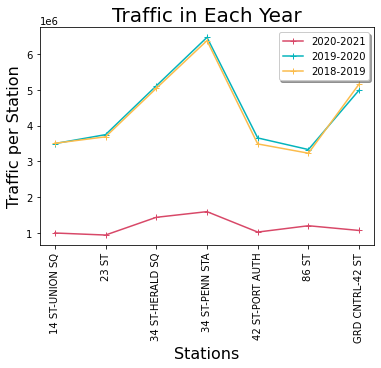

In [20]:
plt.plot(masked_station[masked_station['PERIOD'] == '2020-2021'].STATION, masked_station[masked_station['PERIOD'] == '2020-2021'].TRAFFIC, color='#D84868', marker='+')
plt.plot(masked_station[masked_station['PERIOD'] == '2019-2020'].STATION, masked_station[masked_station['PERIOD'] == '2019-2020'].TRAFFIC, color='#04B4BC', marker='+')
plt.plot(masked_station[masked_station['PERIOD'] == '2018-2019'].STATION, masked_station[masked_station['PERIOD'] == '2018-2019'].TRAFFIC, color='#FBBC4C', marker='+')

plt.title('Traffic in Each Year', fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel('Stations', fontsize=16, )
plt.ylabel('Traffic per Station', fontsize=16)
plt.legend(['2020-2021','2019-2020','2018-2019'],shadow = True, loc = 0);
plt.show()


Now we will compare Christmas and New Year periods among all years

In [21]:
Christmas_df = Basic_df.loc[Basic_df['DATE'].dt.month == 12,: ]
New_Year_df = Basic_df.loc[Basic_df['DATE'].dt.month == 1,: ]

In [22]:
Christmas_df.sample(3)

,index,PERIOD,DATE,STATION,C/A,UNIT,SCP,ENTRIES_PER_DAY,EXITS_PER_DAY,WEEKDAY,WEEKDAY_INDEX,TRAFFIC
314899,315214,2020-2021,2020-12-27,PATH WTC 2,PTH21,R540,01-00-03,5,119,Sunday,6,124
299778,300089,2020-2021,2020-12-24,NEWARK C,PTH19,R549,02-01-06,145,30,Thursday,3,175
18099,18104,2018-2019,2018-12-25,MT EDEN AV,R285,R308,00-00-00,641,505,Tuesday,1,1146


In [23]:
New_Year_df.sample(3)

,index,PERIOD,DATE,STATION,C/A,UNIT,SCP,ENTRIES_PER_DAY,EXITS_PER_DAY,WEEKDAY,WEEKDAY_INDEX,TRAFFIC
246618,246867,2019-2020,2020-01-13,14 ST-UNION SQ,A034,R170,03-03-01,2259,1632,Monday,0,3891
110899,111005,2018-2019,2019-01-14,46 ST,N316,R267,00-00-02,1702,85,Monday,0,1787
341109,341432,2020-2021,2021-01-02,23 ST,R227A,R131,01-06-01,18,29,Saturday,5,47


In [24]:
Christmas_df = pd.DataFrame(Christmas_df.groupby(['STATION'], as_index = False).TRAFFIC.sum())

In [25]:
Christmas_df_top10 = Christmas_df.sort_values('TRAFFIC', ascending = False).head(10)

In [26]:
Christmas_df_top10.head()

,STATION,TRAFFIC
61,34 ST-PENN STA,4799650
59,34 ST-HERALD SQ,4361066
233,GRD CNTRL-42 ST,3492805
352,TIMES SQ-42 ST,3134963
68,42 ST-PORT AUTH,2850932


In [27]:
New_Year_df = pd.DataFrame(New_Year_df.groupby(['STATION'], as_index = False).TRAFFIC.sum())

In [28]:
New_Year_df_top10 = New_Year_df.sort_values('TRAFFIC', ascending = False).head(10)

In [29]:
New_Year_df_top10.head()

,STATION,TRAFFIC
61,34 ST-PENN STA,9651575
233,GRD CNTRL-42 ST,7744951
59,34 ST-HERALD SQ,7237382
46,23 ST,5961085
352,TIMES SQ-42 ST,5762878


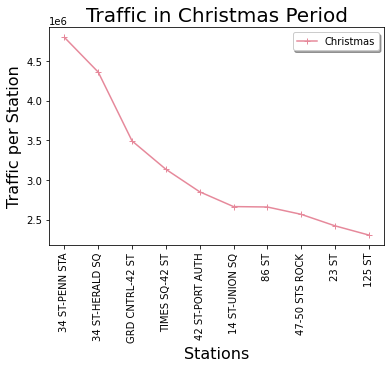

In [30]:
plt.plot(Christmas_df_top10.STATION, Christmas_df_top10.TRAFFIC, color='#e6899b', marker='+')

plt.title('Traffic in Christmas Period', fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel('Stations', fontsize=16, )
plt.ylabel('Traffic per Station', fontsize=16)
plt.legend(['Christmas'],shadow = True, loc = 0);
plt.show()

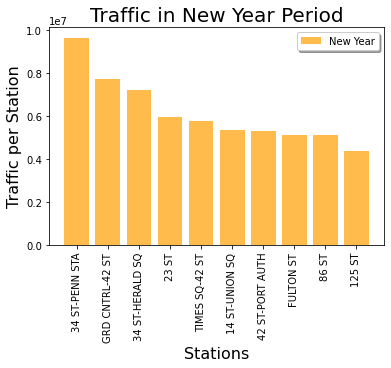

In [31]:
plt.bar(New_Year_df_top10.STATION, New_Year_df_top10.TRAFFIC, color='#FFBB4C')

plt.title('Traffic in New Year Period', fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel('Stations', fontsize=16, )
plt.ylabel('Traffic per Station', fontsize=16)
plt.legend(['New Year'],shadow = True, loc = 0);
plt.show()

In [32]:
intersection_stations_2 = pd.Series(np.intersect1d(Christmas_df_top10.STATION,New_Year_df_top10.STATION))
intersection_stations_2

0             125 ST
1     14 ST-UNION SQ
2              23 ST
3    34 ST-HERALD SQ
4     34 ST-PENN STA
5    42 ST-PORT AUTH
6              86 ST
7    GRD CNTRL-42 ST
8     TIMES SQ-42 ST
dtype: object

In [33]:
Christmas_inter10_stations_mask = ((Christmas_df_top10['STATION'] == '125 ST') | (Christmas_df_top10['STATION'] == '14 ST-UNION SQ') |
       (Christmas_df_top10['STATION'] == '23 ST') | (Christmas_df_top10['STATION'] == '34 ST-HERALD SQ') |
       (Christmas_df_top10['STATION'] == '34 ST-PENN STA') |(Christmas_df_top10['STATION'] == '42 ST-PORT AUTH') |
       (Christmas_df_top10['STATION'] == '86 ST') | (Christmas_df_top10['STATION'] == 'GRD CNTRL-42 ST') |
       (Christmas_df_top10['STATION'] == 'TIMES SQ-42 ST'))

New_inter10_stations_mask = ((New_Year_df_top10['STATION'] == '125 ST') | (New_Year_df_top10['STATION'] == '14 ST-UNION SQ') |
       (New_Year_df_top10['STATION'] == '23 ST') | (New_Year_df_top10['STATION'] == '34 ST-HERALD SQ') |
       (New_Year_df_top10['STATION'] == '34 ST-PENN STA') |(New_Year_df_top10['STATION'] == '42 ST-PORT AUTH') |
       (New_Year_df_top10['STATION'] == '86 ST') | (New_Year_df_top10['STATION'] == 'GRD CNTRL-42 ST') |
       (New_Year_df_top10['STATION'] == 'TIMES SQ-42 ST'))

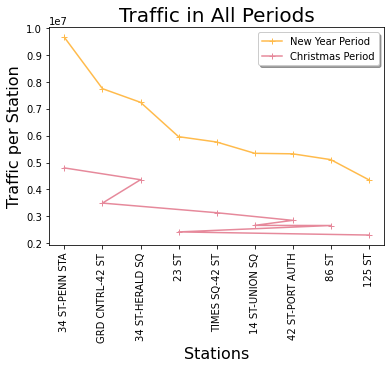

In [34]:
plt.plot(New_Year_df_top10[New_inter10_stations_mask].STATION, New_Year_df_top10[New_inter10_stations_mask].TRAFFIC, color='#FFBB4C', marker='+')
plt.plot(Christmas_df_top10[Christmas_inter10_stations_mask].STATION, Christmas_df_top10[Christmas_inter10_stations_mask].TRAFFIC, color='#e6899b', marker='+')


plt.title('Traffic in All Periods', fontsize=20)
plt.xticks(rotation = 90)
plt.xlabel('Stations', fontsize=16, )
plt.ylabel('Traffic per Station', fontsize=16)
plt.legend(['New Year Period', 'Christmas Period'],shadow = True, loc = 0);
plt.show()

Now lets take a look on the most crowded station in specefic day in New Year Period

In [35]:
days_station_df = Basic_df.loc[Basic_df['DATE'].dt.month == 1,: ]
days_station_df = days_station_df.groupby(['WEEKDAY_INDEX', 'STATION'], as_index = False).TRAFFIC.sum()

In [36]:
days_station_df.head()

,WEEKDAY_INDEX,STATION,TRAFFIC
0,0,1 AV,178568
1,0,103 ST,216609
2,0,103 ST-CORONA,168496
3,0,104 ST,30876
4,0,110 ST,94748


In [37]:
days_station_df.sort_values('WEEKDAY_INDEX', ascending = False, inplace = True)

In [38]:
days_station_df.head()

,WEEKDAY_INDEX,STATION,TRAFFIC
2645,6,ZEREGA AV,8307
2397,6,AVENUE J,22432
2388,6,AQUEDUCT N.COND,6042
2389,6,AQUEDUCT RACETR,7430
2390,6,ASTOR PL,58536


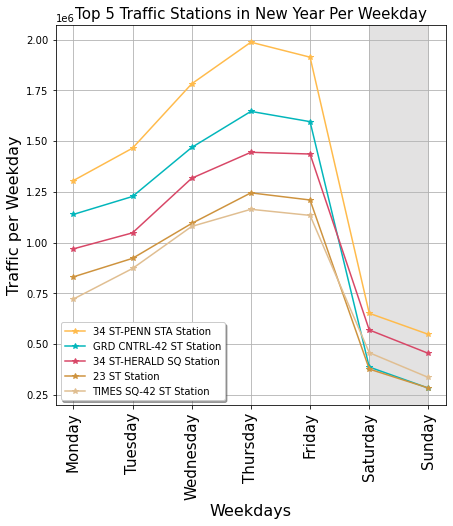

In [39]:
plt.figure(figsize=[7,7])
plt.plot(days_station_df[(days_station_df['STATION'] == '34 ST-PENN STA')].WEEKDAY_INDEX, days_station_df[(days_station_df['STATION'] == '34 ST-PENN STA')].TRAFFIC, color='#FFBB4C', marker='*')
plt.plot(days_station_df[(days_station_df['STATION'] == 'GRD CNTRL-42 ST')].WEEKDAY_INDEX, days_station_df[(days_station_df['STATION'] == 'GRD CNTRL-42 ST')].TRAFFIC, color='#02b6bb', marker='*')
plt.plot(days_station_df[(days_station_df['STATION'] == '34 ST-HERALD SQ')].WEEKDAY_INDEX, days_station_df[(days_station_df['STATION'] == '34 ST-HERALD SQ')].TRAFFIC, color='#D84767', marker='*')
plt.plot(days_station_df[(days_station_df['STATION'] == '23 ST')].WEEKDAY_INDEX, days_station_df[(days_station_df['STATION'] == '23 ST')].TRAFFIC, color='#CE933E', marker='*')
plt.plot(days_station_df[(days_station_df['STATION'] == 'TIMES SQ-42 ST')].WEEKDAY_INDEX, days_station_df[(days_station_df['STATION'] == 'TIMES SQ-42 ST')].TRAFFIC, color='#E0BE91', marker='*')

plt.grid()
ticks_x = np.linspace(0,6,7)
label = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

plt.axvspan(5,6, color='#C8C6C6', alpha=0.5)
plt.title('Top 5 Traffic Stations in New Year Per Weekday', fontsize=15)
plt.xticks(ticks_x, label, fontsize = '15', rotation = 90)
plt.xlabel('Weekdays', fontsize=16, )
plt.ylabel('Traffic per Weekday', fontsize=16)
plt.legend(['34 ST-PENN STA Station', 'GRD CNTRL-42 ST Station', '34 ST-HERALD SQ Station', '23 ST Station', 'TIMES SQ-42 ST Station'],shadow = True, loc = 3);
plt.show()